<a href="https://colab.research.google.com/github/mprksa/Mangga/blob/main/Mangga_Penggabungan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

In [2]:
!git clone https://github.com/mprksa/Mangga.git

Cloning into 'Mangga'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 117 (delta 32), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (117/117), 1.98 MiB | 6.97 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [135]:
# Fungsi untuk augmentasi gambar
def augment_image(image):
    # Rotasi acak
    angle = np.random.uniform(-15, 15)
    image = image.rotate(angle)
    # Penambahan kontras
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(np.random.uniform(0.8, 1.2))
    return image

# Fungsi untuk membaca dan mengaugmentasi gambar
def load_images_from_folder(folder, augment=False):
    images = []
    labels = []
    for label, category in enumerate(['mangga_matang', 'mangga_mentah', 'mangga_setengah_matang']):
        category_folder = os.path.join(folder, category)
        for filename in os.listdir(category_folder):
            img_path = os.path.join(category_folder, filename)
            try:
                image = Image.open(img_path)
                image = image.convert('RGB')  # Konversi ke RGB
                if augment:
                    image = augment_image(image)
                image = image.resize((64, 64))  # Ubah ukuran gambar jika perlu
                image_np = np.array(image).flatten()
                images.append(image_np)
                labels.append(label)
            except Exception as e:
                print(f"Error processing file {img_path}: {e}")
    return np.array(images), np.array(labels)

In [136]:
# Folder dataset
dataset_base_folder = 'Mangga'

In [137]:
# Membaca data train, test, dan validation
X_train, y_train = load_images_from_folder(os.path.join(dataset_base_folder, 'train'))
X_test, y_test = load_images_from_folder(os.path.join(dataset_base_folder, 'test'))
X_val, y_val = load_images_from_folder(os.path.join(dataset_base_folder, 'validation'))

In [138]:
# Augmentasi data train
X_train_augmented, y_train_augmented = load_images_from_folder(os.path.join(dataset_base_folder, 'train'), augment=True)

In [139]:
# Kombinasikan data asli dan augmentasi
X_train_combined = np.vstack((X_train, X_train_augmented))
y_train_combined = np.hstack((y_train, y_train_augmented))

In [140]:
# Tampilkan jumlah gambar di setiap set
print(f"Jumlah gambar di train set (asli): {len(X_train)}")
print(f"Jumlah gambar di train set (augmentasi): {len(X_train_augmented)}")
print(f"Jumlah total gambar di train set: {len(X_train_combined)}")
print(f"Jumlah gambar di test set: {len(X_test)}")
print(f"Jumlah gambar di validation set: {len(X_val)}")

Jumlah gambar di train set (asli): 15
Jumlah gambar di train set (augmentasi): 15
Jumlah total gambar di train set: 30
Jumlah gambar di test set: 15
Jumlah gambar di validation set: 15


In [141]:
# Inisialisasi dan training model K-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_combined, y_train_combined)

KNeighborsClassifier(n_neighbors=3)

In [142]:
# Evaluasi model K-NN
y_train_pred_knn = knn.predict(X_train_combined)
y_test_pred_knn = knn.predict(X_test)
y_val_pred_knn = knn.predict(X_val)

train_accuracy_knn = accuracy_score(y_train_combined, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
val_accuracy_knn = accuracy_score(y_val, y_val_pred_knn)

In [144]:
print(f"Akurasi K-NN pada train set: {train_accuracy_knn:.2f}")
print(f"Akurasi K-NN pada test set: {test_accuracy_knn:.2f}")
print(f"Akurasi K-NN pada validation set: {val_accuracy_knn:.2f}")

Akurasi K-NN pada train set: 0.83
Akurasi K-NN pada test set: 0.80
Akurasi K-NN pada validation set: 0.80


In [145]:
# Inisialisasi dan training model SVM
svm = SVC(kernel='linear')
svm.fit(X_train_combined, y_train_combined)

SVC(kernel='linear')

In [146]:
# Evaluasi model SVM
y_train_pred_svm = svm.predict(X_train_combined)
y_test_pred_svm = svm.predict(X_test)
y_val_pred_svm = svm.predict(X_val)

train_accuracy_svm = accuracy_score(y_train_combined, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)

In [147]:
print(f"Akurasi SVM pada train set: {train_accuracy_svm:.2f}")
print(f"Akurasi SVM pada test set: {test_accuracy_svm:.2f}")
print(f"Akurasi SVM pada validation set: {val_accuracy_svm:.2f}")

Akurasi SVM pada train set: 1.00
Akurasi SVM pada test set: 1.00
Akurasi SVM pada validation set: 1.00


In [148]:
# Inisialisasi dan training model Decision Tree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_combined, y_train_combined)

DecisionTreeClassifier(random_state=0)

In [149]:
# Evaluasi model Decision Tree
y_train_pred_dt = dt.predict(X_train_combined)
y_test_pred_dt = dt.predict(X_test)
y_val_pred_dt = dt.predict(X_val)

train_accuracy_dt = accuracy_score(y_train_combined, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)

In [150]:
print(f"Akurasi Decision Tree pada train set: {train_accuracy_dt:.2f}")
print(f"Akurasi Decision Tree pada test set: {test_accuracy_dt:.2f}")
print(f"Akurasi Decision Tree pada validation set: {val_accuracy_dt:.2f}")

Akurasi Decision Tree pada train set: 1.00
Akurasi Decision Tree pada test set: 1.00
Akurasi Decision Tree pada validation set: 1.00


In [151]:
# Inisialisasi dan training model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_combined, y_train_combined)

RandomForestClassifier(random_state=0)

In [152]:
# Evaluasi model Random Forest
y_train_pred_rf = rf.predict(X_train_combined)
y_test_pred_rf = rf.predict(X_test)
y_val_pred_rf = rf.predict(X_val)

train_accuracy_rf = accuracy_score(y_train_combined, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)

In [153]:
print(f"Akurasi Random Forest pada train set: {train_accuracy_rf:.2f}")
print(f"Akurasi Random Forest pada test set: {test_accuracy_rf:.2f}")
print(f"Akurasi Random Forest pada validation set: {val_accuracy_rf:.2f}")

Akurasi Random Forest pada train set: 1.00
Akurasi Random Forest pada test set: 1.00
Akurasi Random Forest pada validation set: 1.00


In [154]:
# Inisialisasi dan training model Naive Bayes
nb = GaussianNB()
nb.fit(X_train_combined, y_train_combined)

GaussianNB()

In [155]:
# Evaluasi model Naive Bayes
y_train_pred_nb = nb.predict(X_train_combined)
y_test_pred_nb = nb.predict(X_test)
y_val_pred_nb = nb.predict(X_val)

train_accuracy_nb = accuracy_score(y_train_combined, y_train_pred_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
val_accuracy_nb = accuracy_score(y_val, y_val_pred_nb)

In [156]:
print(f"Akurasi Naive Bayes pada train set: {train_accuracy_nb:.2f}")
print(f"Akurasi Naive Bayes pada test set: {test_accuracy_nb:.2f}")
print(f"Akurasi Naive Bayes pada validation set: {val_accuracy_nb:.2f}")

Akurasi Naive Bayes pada train set: 0.97
Akurasi Naive Bayes pada test set: 0.93
Akurasi Naive Bayes pada validation set: 0.93



Confusion Matrix K-NN


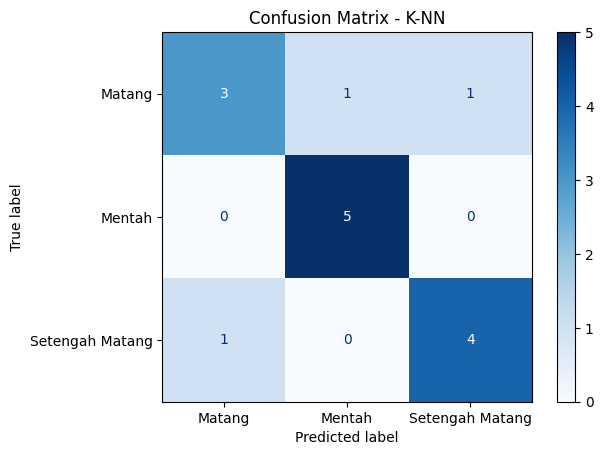

In [157]:
# Menampilkan confusion matrix dan classification report untuk K-NN
print("\nConfusion Matrix K-NN")
conf_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)
ConfusionMatrixDisplay(conf_matrix_knn, display_labels=['Matang', 'Mentah', 'Setengah Matang']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - K-NN')
plt.show()

In [158]:
print("\nClassification Report K-NN")
print(classification_report(y_test, y_test_pred_knn, target_names=['Matang', 'Mentah', 'Setengah Matang']))


Classification Report K-NN
                 precision    recall  f1-score   support

         Matang       0.75      0.60      0.67         5
         Mentah       0.83      1.00      0.91         5
Setengah Matang       0.80      0.80      0.80         5

       accuracy                           0.80        15
      macro avg       0.79      0.80      0.79        15
   weighted avg       0.79      0.80      0.79        15




Confusion Matrix SVM


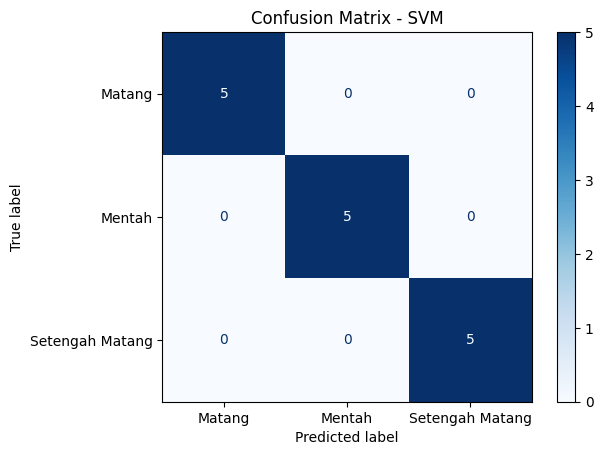

In [159]:
# Menampilkan confusion matrix dan classification report untuk SVM
print("\nConfusion Matrix SVM")
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
ConfusionMatrixDisplay(conf_matrix_svm, display_labels=['Matang', 'Mentah', 'Setengah Matang']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.show()

In [160]:
print("\nClassification Report SVM")
print(classification_report(y_test, y_test_pred_svm, target_names=['Matang', 'Mentah', 'Setengah Matang']))


Classification Report SVM
                 precision    recall  f1-score   support

         Matang       1.00      1.00      1.00         5
         Mentah       1.00      1.00      1.00         5
Setengah Matang       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15




Confusion Matrix Decision Tree


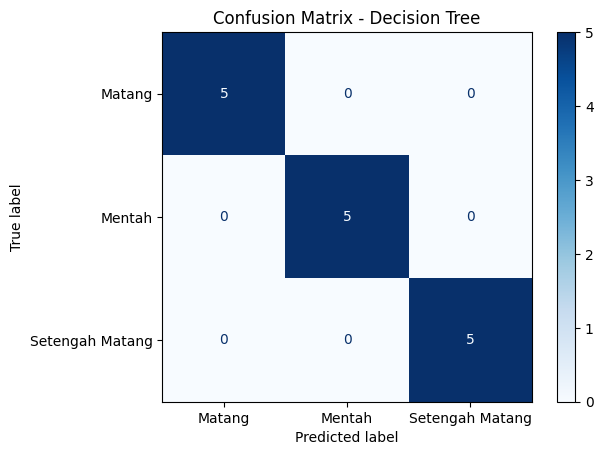

In [161]:
# Menampilkan confusion matrix dan classification report untuk Decision Tree
print("\nConfusion Matrix Decision Tree")
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)
ConfusionMatrixDisplay(conf_matrix_dt, display_labels=['Matang', 'Mentah', 'Setengah Matang']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [162]:
print("\nClassification Report Decision Tree")
print(classification_report(y_test, y_test_pred_dt, target_names=['Matang', 'Mentah', 'Setengah Matang']))


Classification Report Decision Tree
                 precision    recall  f1-score   support

         Matang       1.00      1.00      1.00         5
         Mentah       1.00      1.00      1.00         5
Setengah Matang       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15




Confusion Matrix Random Forest


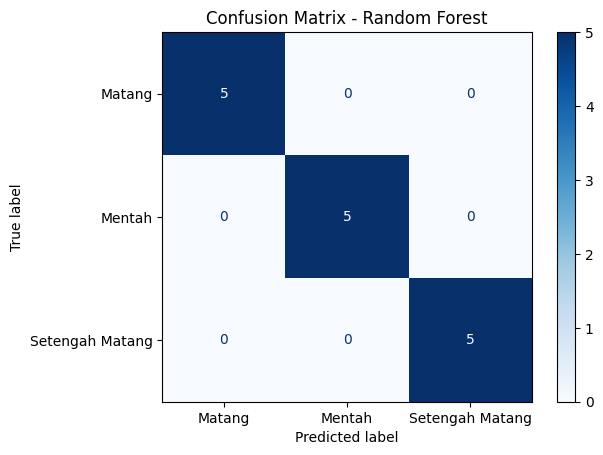

In [163]:
# Menampilkan confusion matrix dan classification report untuk Random Forest
print("\nConfusion Matrix Random Forest")
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
ConfusionMatrixDisplay(conf_matrix_rf, display_labels=['Matang', 'Mentah', 'Setengah Matang']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [165]:
print("\nClassification Report Random Forest")
print(classification_report(y_test, y_test_pred_rf, target_names=['Matang', 'Mentah', 'Setengah Matang']))


Classification Report Random Forest
                 precision    recall  f1-score   support

         Matang       1.00      1.00      1.00         5
         Mentah       1.00      1.00      1.00         5
Setengah Matang       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15




Confusion Matrix Naive Bayes


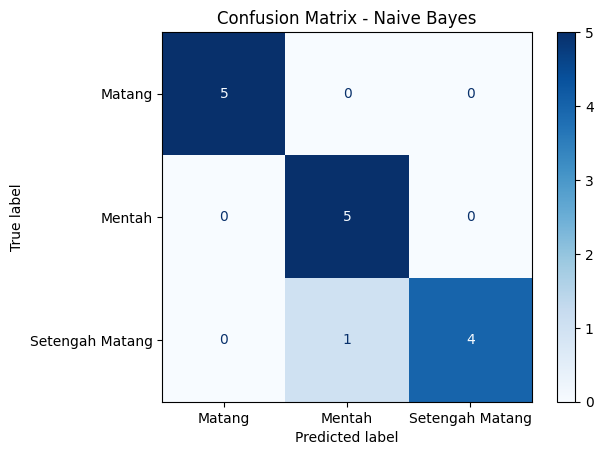

In [166]:
# Menampilkan confusion matrix dan classification report untuk Naive Bayes
print("\nConfusion Matrix Naive Bayes")
conf_matrix_nb = confusion_matrix(y_test, y_test_pred_nb)
ConfusionMatrixDisplay(conf_matrix_nb, display_labels=['Matang', 'Mentah', 'Setengah Matang']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [167]:
print("\nClassification Report Naive Bayes")
print(classification_report(y_test, y_test_pred_nb, target_names=['Matang', 'Mentah', 'Setengah Matang']))


Classification Report Naive Bayes
                 precision    recall  f1-score   support

         Matang       1.00      1.00      1.00         5
         Mentah       0.83      1.00      0.91         5
Setengah Matang       1.00      0.80      0.89         5

       accuracy                           0.93        15
      macro avg       0.94      0.93      0.93        15
   weighted avg       0.94      0.93      0.93        15



In [172]:
from sklearn.metrics import classification_report

# Buat dictionary untuk menyimpan semua classification report
classification_reports = {}

# Masukkan classification report untuk setiap model ke dalam dictionary
classification_reports['K-NN'] = classification_report(y_test, y_test_pred_knn, target_names=['Matang', 'Mentah', 'Setengah Matang'])
classification_reports['SVM'] = classification_report(y_test, y_test_pred_svm, target_names=['Matang', 'Mentah', 'Setengah Matang'])
classification_reports['Decision Tree'] = classification_report(y_test, y_test_pred_dt, target_names=['Matang', 'Mentah', 'Setengah Matang'])
classification_reports['Random Forest'] = classification_report(y_test, y_test_pred_rf, target_names=['Matang', 'Mentah', 'Setengah Matang'])
classification_reports['Naive Bayes'] = classification_report(y_test, y_test_pred_nb, target_names=['Matang', 'Mentah', 'Setengah Matang'])

# Print semua classification report secara bersamaan
for model, report in classification_reports.items():
    print(f"\nClassification Report {model}")
    print(report)



Classification Report K-NN
                 precision    recall  f1-score   support

         Matang       0.75      0.60      0.67         5
         Mentah       0.83      1.00      0.91         5
Setengah Matang       0.80      0.80      0.80         5

       accuracy                           0.80        15
      macro avg       0.79      0.80      0.79        15
   weighted avg       0.79      0.80      0.79        15


Classification Report SVM
                 precision    recall  f1-score   support

         Matang       1.00      1.00      1.00         5
         Mentah       1.00      1.00      1.00         5
Setengah Matang       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15


Classification Report Decision Tree
                 precision    recall  f1-score   support

         Matang       1.00      1.00      1.00

In [178]:
import time
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Fungsi untuk menghitung dan mengumpulkan metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Fungsi untuk melakukan training dan prediksi sambil mengukur waktu
def train_and_predict(model, X_train, y_train, X_test):
    start_train_time = time.time()
    model.fit(X_train, y_train)
    end_train_time = time.time()
    train_time = end_train_time - start_train_time

    start_pred_time = time.time()
    y_pred = model.predict(X_test)
    end_pred_time = time.time()
    pred_time = end_pred_time - start_pred_time

    return y_pred, train_time, pred_time

In [179]:
# Inisialisasi model-model yang akan digunakan
models = {
    'K-NN': KNeighborsClassifier(n_neighbors=3),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0),
    'Naive Bayes': GaussianNB()
}


In [180]:
# Inisialisasi dictionary untuk menyimpan hasil evaluasi
results_train = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Training Time (s)': [],
    'Prediction Time (s)': []
}

In [181]:
# Menghitung dan menyimpan metrics untuk setiap model
for model_name, model in models.items():
    y_pred_train, train_time, pred_time = train_and_predict(model, X_train_combined, y_train_combined, X_train_combined)
    accuracy, precision, recall, f1 = calculate_metrics(y_train_combined, y_pred_train)

    results_train['Model'].append(model_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-Score'].append(f1)
    results_train['Training Time (s)'].append(train_time)
    results_train['Prediction Time (s)'].append(pred_time)

# Membuat DataFrame dari dictionary hasil evaluasi
df_results_train = pd.DataFrame(results_train)

In [183]:
# Menampilkan tabel hasil evaluasi
print("\nResults on Train Data")
print(df_results_train)


Results on Train Data
           Model  Accuracy  Precision    Recall  F1-Score  Training Time (s)  \
0           K-NN  0.833333   0.837121  0.833333  0.830688           0.002851   
1            SVM  1.000000   1.000000  1.000000  1.000000           0.024330   
2  Decision Tree  1.000000   1.000000  1.000000  1.000000           0.106549   
3  Random Forest  1.000000   1.000000  1.000000  1.000000           0.191559   
4    Naive Bayes  0.966667   0.969697  0.966667  0.966583           0.006082   

   Prediction Time (s)  
0             0.010334  
1             0.012271  
2             0.001126  
3             0.005694  
4             0.008217  
